In [13]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('output/universityData_trial4.csv')

In [19]:
print(df.notnull().sum().sum())

106328


In [21]:
df.shape

(9440, 13)

In [27]:
df.head()

,Unnamed: 0.1,Unnamed: 0,decision,name,location,university,program,months,papers,applied_on,decision_date,GRE_Verbal,GRE_Quants,GRE_AWA,TOEFL_Reading,TOEFL_Speaking,TOEFL_Listening,TOEFL_Writing
0,0,4717,applied,Ahamed Asif Sadiq,"Khulna, Bangladesh",University of Regina,Civil and Environmental Engineering - Project ...,NaN,0,"Nov 02, 2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4416,admit,Juhi Malkani,"Maharashtra, India",San Jose State University,Computer Science,18.0,0,"Dec 27, 2021","Mar 23, 2022",V152V,Q161Q,AWA4,R28R,S26S,L30L,W28
2,2,1097,applied,Rama Narasimhan,"Tamil Nadu, India",University of North Carolina - Chapel Hill,Computer Science,38.0,0,"Mar 06, 2022",NaN,V155V,Q168Q,AWA4,R30R,S21S,L26L,W27
3,3,1738,applied,Sandeep Kaur,"Punjab, India",University of San Francisco,Laws / Bachelor of Computer Science - Software...,NaN,0,"Sep 30, 2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4702,admit,Nishant Jha,"Haryana, India",Iowa State University,Computer Science and Engineering,12.0,15,"Jan 07, 2023","Apr 02, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,months,papers
count,9440.000000,9440.000000,6480.000000,9440.000000
mean,4719.500000,2359.500000,21.969136,0.797881
std,2725.237604,1362.618779,28.242773,1.873937
min,0.000000,0.000000,2.000000,0.000000
25%,2359.750000,1179.750000,7.000000,0.000000
50%,4719.500000,2359.500000,15.000000,0.000000
75%,7079.250000,3539.250000,26.250000,1.000000
max,9439.000000,4719.000000,365.000000,33.000000


In [24]:
df_gre_split = df['gre'].str.split(' ', expand=True)
df_gre_split.columns = ['GRE_Verbal', 'GRE_Quants', 'GRE_AWA']


df[['GRE_Verbal', 'GRE_Quants', 'GRE_AWA']] = df_gre_split


df = df.drop(columns=['gre'])


In [25]:
df_toefl_split = df['toefl'].str.split(' ', expand=True)
df_toefl_split.columns = ['TOEFL_Reading', 'TOEFL_Speaking', 'TOEFL_Listening', 'TOEFL_Writing']

df[['TOEFL_Reading', 'TOEFL_Speaking', 'TOEFL_Listening', 'TOEFL_Writing']] = df_toefl_split

df = df.drop(columns=['toefl'])

In [28]:
def extract_numbers(s):
    return pd.to_numeric(''.join(filter(str.isdigit, str(s))), errors='coerce')


df['TOEFL_Listening'] = df['TOEFL_Listening'].apply(extract_numbers)
df['TOEFL_Reading'] = df['TOEFL_Reading'].apply(extract_numbers)
df['TOEFL_Writing'] = df['TOEFL_Writing'].apply(extract_numbers)
df['TOEFL_Speaking'] = df['TOEFL_Speaking'].apply(extract_numbers)

In [29]:
df['GRE_Verbal'] = df['GRE_Verbal'].apply(extract_numbers)
df['GRE_Quants'] = df['GRE_Quants'].apply(extract_numbers)
df['GRE_AWA'] = df['GRE_AWA'].apply(extract_numbers)


In [30]:
df = df.iloc[:, 1:]

In [31]:
import matplotlib.pyplot as plt

<Axes: >

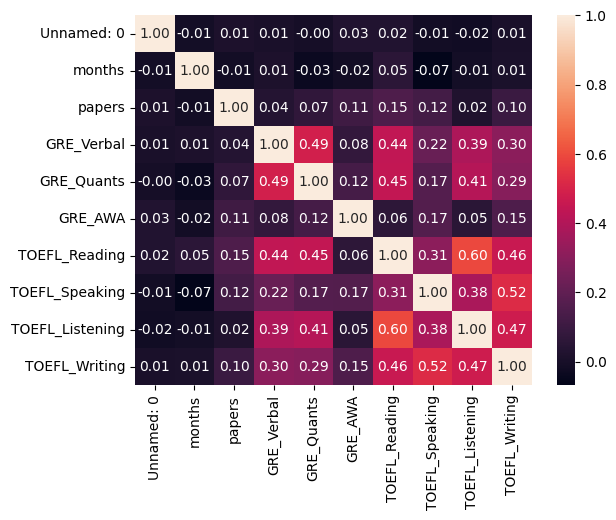

In [32]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, fmt='.2f')

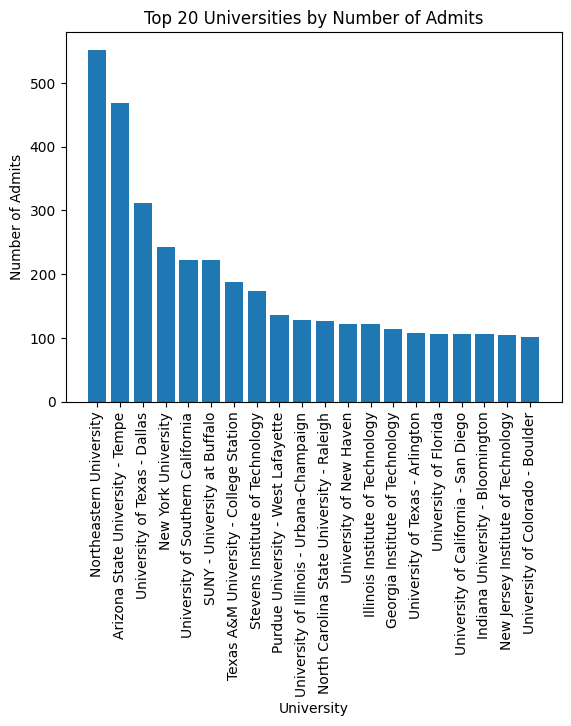

In [33]:
admit_data = df[df["decision"] == "admit"]

university_counts = df.groupby("university")["decision"].count().reset_index()

sorted_universities = university_counts.sort_values("decision", ascending=False)

plt.bar(sorted_universities.head(20)["university"], sorted_universities.head(20)["decision"])
plt.xticks(rotation=90)
plt.xlabel("University")
plt.ylabel("Number of Admits")
plt.title("Top 20 Universities by Number of Admits")
plt.show()



We can see the top 20 universities according to the admits they provided from the above bar plot.

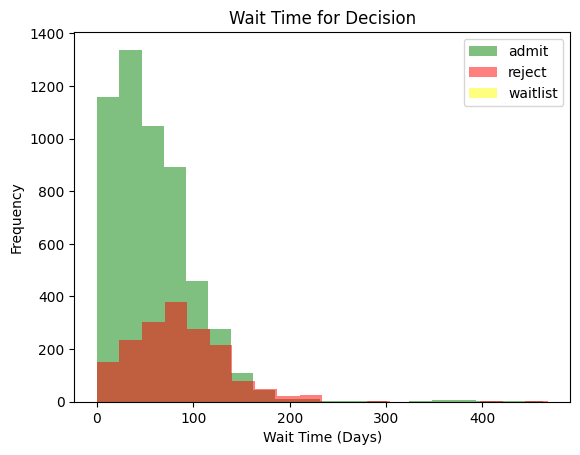

In [34]:
df['applied_on'] = pd.to_datetime(df['applied_on'], format='%b %d, %Y')
df['decision_date'] = pd.to_datetime(df['decision_date'], format='%b %d, %Y')

df['wait_time'] = (df['decision_date'] - df['applied_on']).dt.days

colors = {'admit': 'green', 'reject': 'red', 'waitlist': 'yellow'}
for decision, color in colors.items():
    subset = df[df['decision'] == decision]
    subset['wait_time'].plot(kind='hist', bins=20, alpha=0.5, color=color, label=decision)

plt.title('Wait Time for Decision')
plt.xlabel('Wait Time (Days)')
plt.ylabel('Frequency')

plt.legend()

plt.show()



### From the above plot we can see that the average wait time for any decision is around 100 days. This is justifiable because the students who apply in fall season get their decisions in the Mid-Spring semesters.

In [50]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim

# # Load the dataset into a pandas dataframe
# df = pd.read_csv("dataset.csv")

# Group the dataframe by location and count the number of applicants in each location
location_count = df.groupby('location')['decision'].count().reset_index()

# Create a map centered on the United States
map = folium.Map(location=[39.50, -98.35], zoom_start=2)

# Add a marker for each location with radius proportional to the number of applicants
for index, row in location_count.iterrows():
    radius = row['decision'] * 5
    location = row['location']
    location_lat_lon = (0, 0)
    if location == 'United States':
        location_lat_lon = (39.50, -98.35)
    else:
        geocode = Nominatim(user_agent="geoapiExercises").geocode(location)
        if geocode:
            location_lat_lon = (geocode.latitude, geocode.longitude)
    folium.Marker(location_lat_lon, icon=folium.Icon(color='red')).add_to(map)

# Display the map in a Jupyter notebook cell
map


In [38]:
df.GRE_AWA.replace(35.0,3.5,inplace = True)
df.GRE_AWA.replace(45.0,4,inplace = True)
df.GRE_AWA.replace(35.0,3.5,inplace = True)
df.GRE_AWA.replace(5.0,3.5,inplace = True)
df.GRE_AWA.replace(25.0,2.5,inplace = True)
df.GRE_AWA.replace(15.0,1.5,inplace = True)
df.GRE_AWA.replace(55.0,4,inplace = True)
df.GRE_AWA.replace(6.0,3,inplace = True)

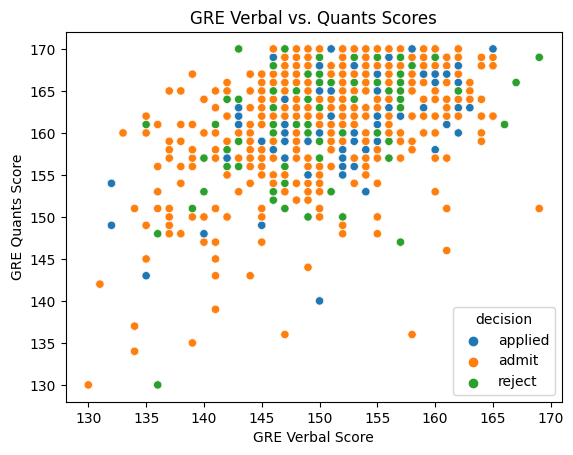

In [39]:
import seaborn as sns

sns.scatterplot(data=df, x='GRE_Verbal', y='GRE_Quants', hue='decision')

plt.title('GRE Verbal vs. Quants Scores')
plt.xlabel('GRE Verbal Score')
plt.ylabel('GRE Quants Score')

plt.show()


### As we can see from the plot the number of students who have good marks have received more admits and the applications on the upper right can be the ones who have applied to very ambitious universities

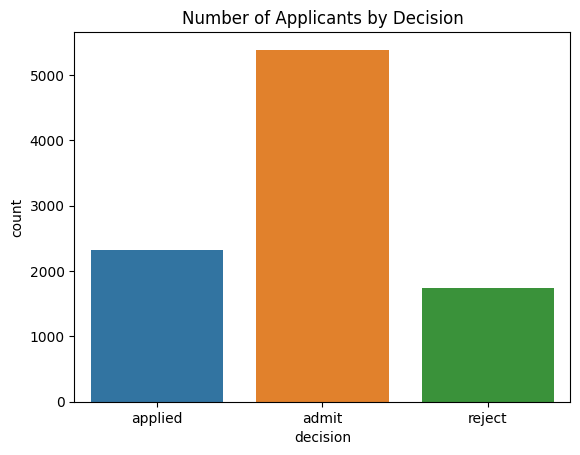

In [40]:
sns.countplot(x="decision", data=df)
plt.title("Number of Applicants by Decision")
plt.show()


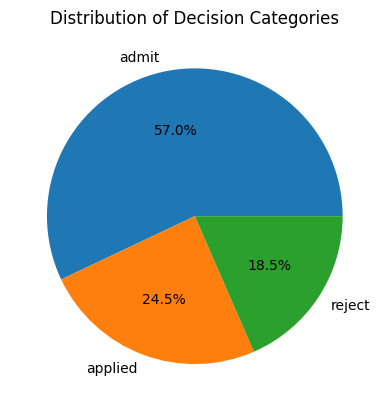

In [41]:
counts = df["decision"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Distribution of Decision Categories")
plt.show()


<Axes: xlabel='GRE_AWA', ylabel='Count'>

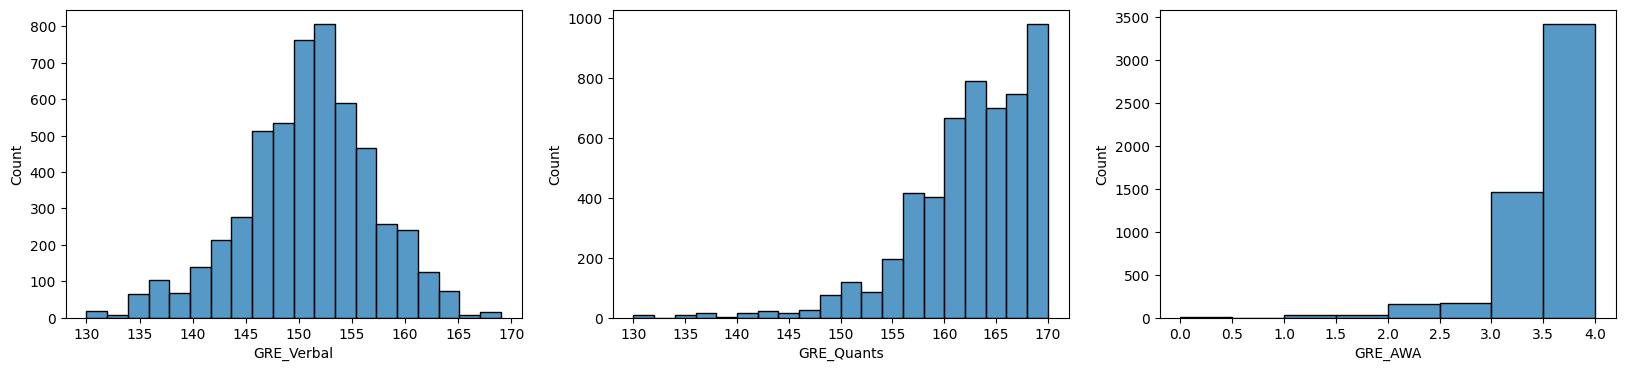

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

sns.histplot(data=df, x='GRE_Verbal', bins=20, ax=axes[0])
sns.histplot(data=df, x='GRE_Quants', bins=20, ax=axes[1])
sns.histplot(data=df, x='GRE_AWA', bins=8, ax=axes[2])

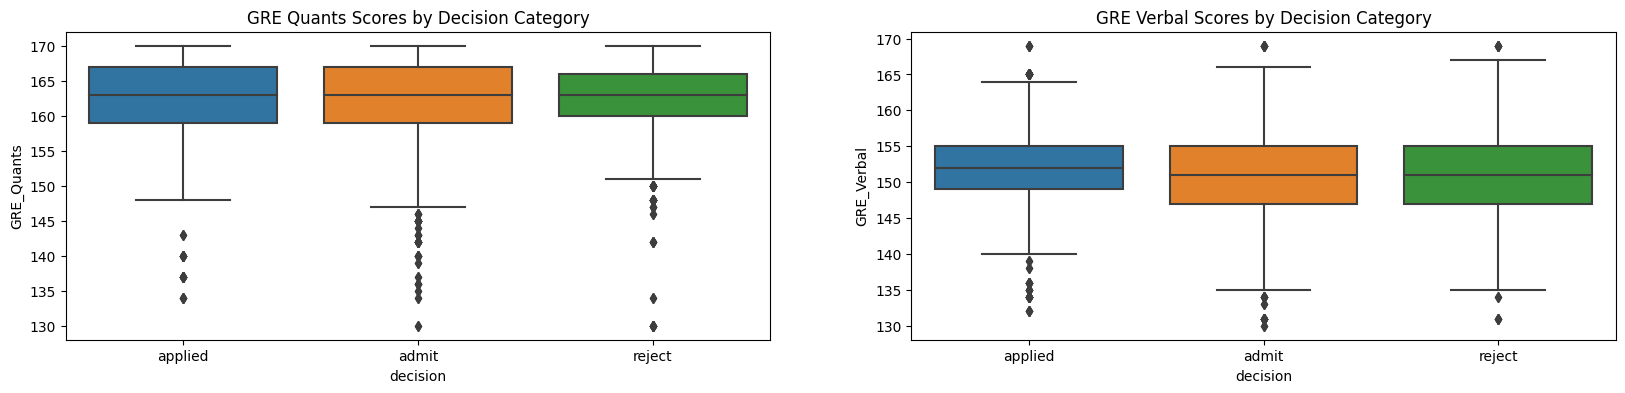

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))


sns.boxplot(x="decision", y="GRE_Quants", data=df,  ax=axes[0])
axes[0].set_title("GRE Quants Scores by Decision Category")



sns.boxplot(x="decision", y="GRE_Verbal", data=df,  ax=axes[1])
axes[1].set_title("GRE Verbal Scores by Decision Category")
plt.show()


### From the above boxplots we can observe that the students tend to score more in Quants section as compared to the Verbal

<Axes: xlabel='TOEFL_Writing', ylabel='Count'>

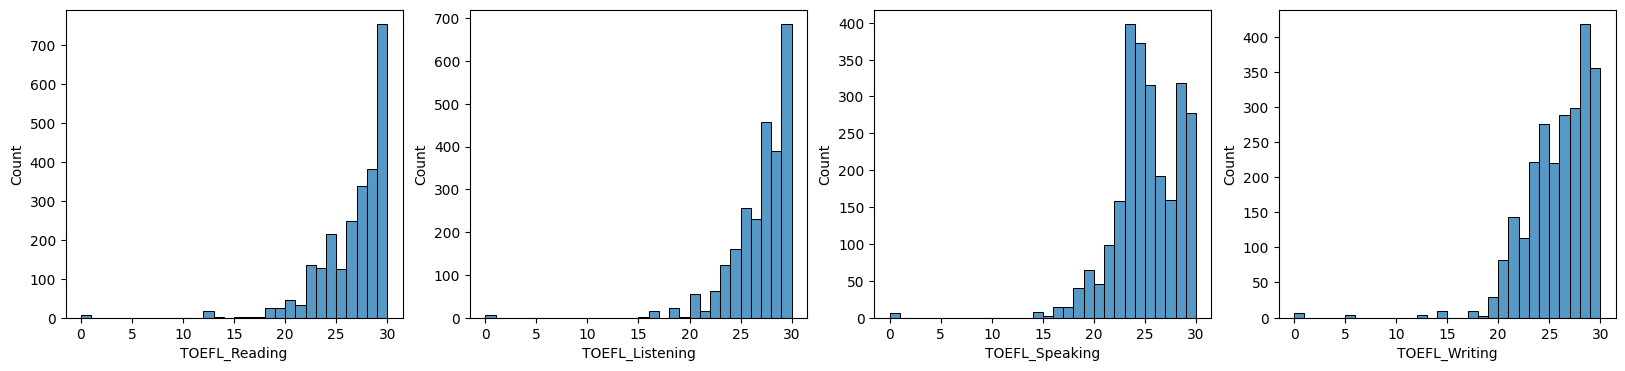

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

sns.histplot(data=df, x='TOEFL_Reading', bins=30, ax=axes[0])
sns.histplot(data=df, x='TOEFL_Listening', bins=30, ax=axes[1])
sns.histplot(data=df, x='TOEFL_Speaking', bins=30, ax=axes[2])
sns.histplot(data=df, x='TOEFL_Writing', bins=30, ax=axes[3])

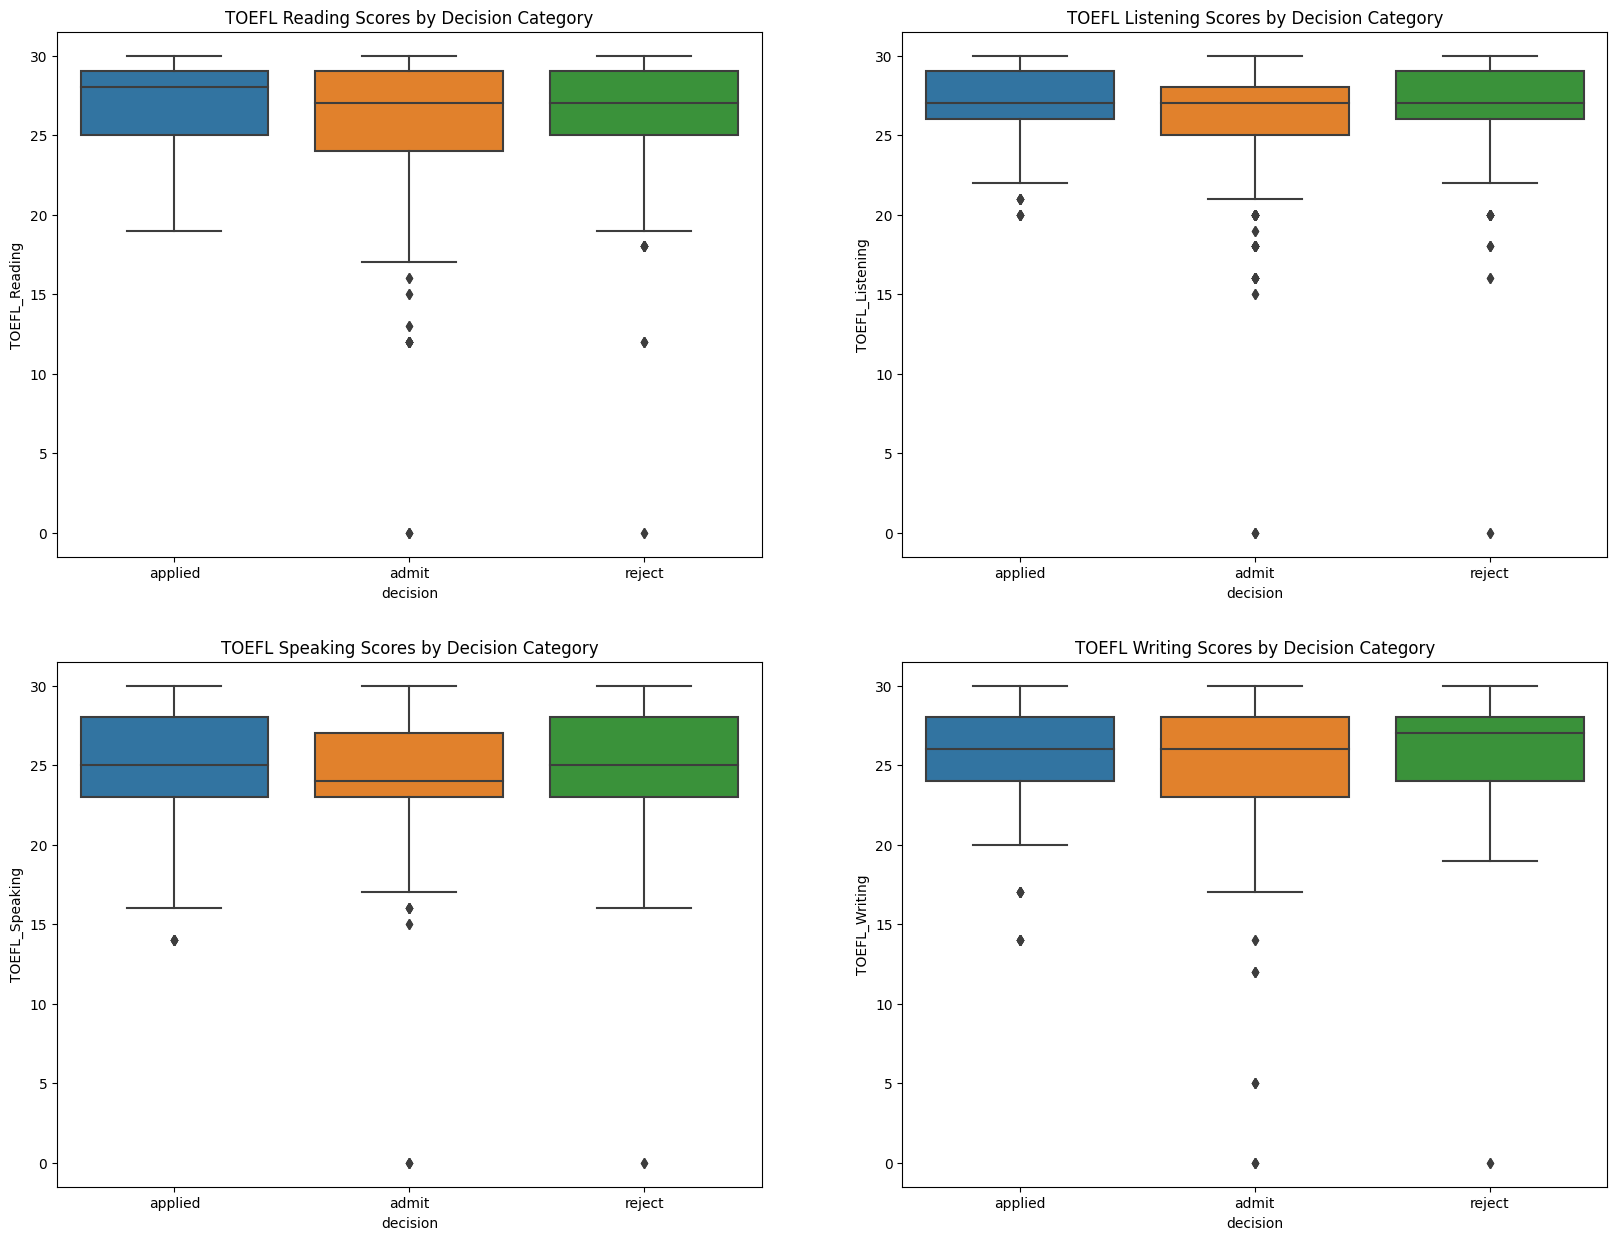

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))


sns.boxplot(x="decision", y="TOEFL_Reading", data=df,  ax=axes[0][0])
axes[0][0].set_title("TOEFL Reading Scores by Decision Category")

sns.boxplot(x="decision", y="TOEFL_Listening", data=df,  ax=axes[0][1])
axes[0][1].set_title("TOEFL Listening Scores by Decision Category")

sns.boxplot(x="decision", y="TOEFL_Speaking", data=df,  ax=axes[1][0])
axes[1][0].set_title("TOEFL Speaking Scores by Decision Category")

sns.boxplot(x="decision", y="TOEFL_Writing", data=df,  ax=axes[1][1])
axes[1][1].set_title("TOEFL Writing Scores by Decision Category")

plt.show()


In [46]:
df.location.nunique()

120

<function matplotlib.pyplot.show(close=None, block=None)>

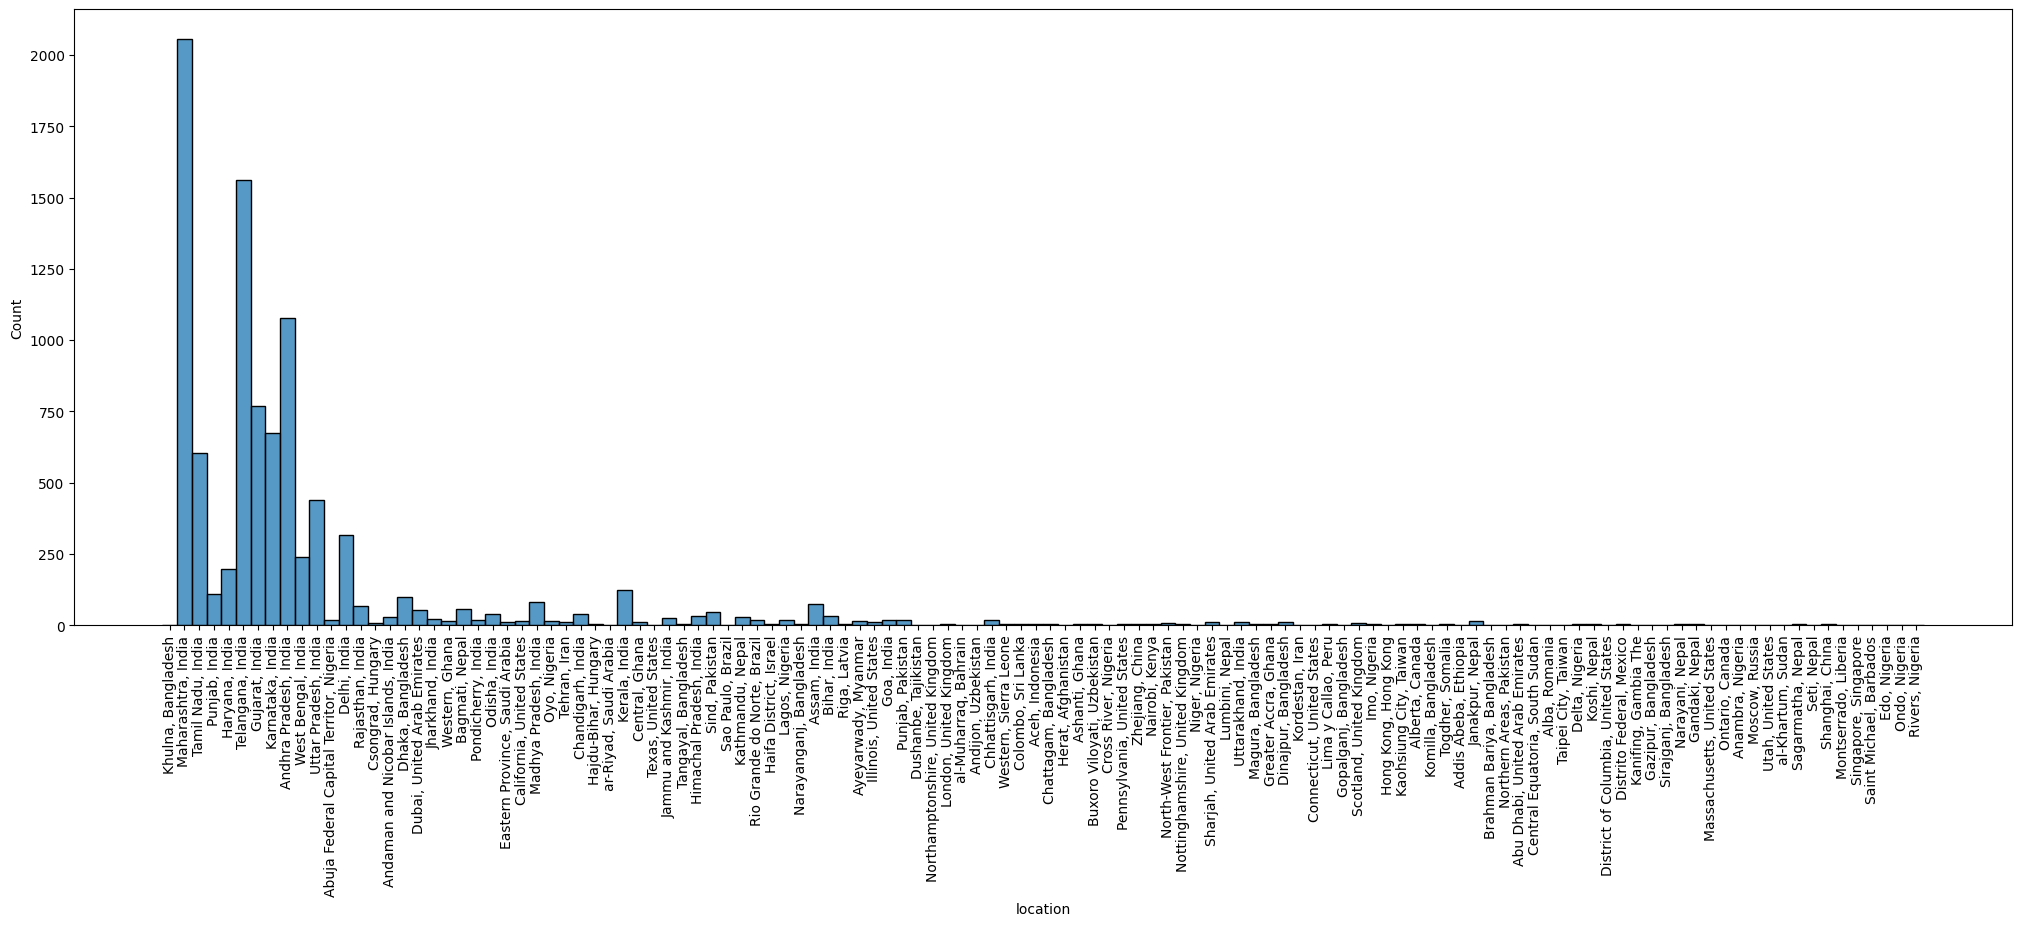

In [47]:
plt.figure(figsize = [25,8])
sns.histplot(data=df, x='location', bins=20)
plt.xticks(rotation = 'vertical')

plt.show

### From the above plot we can see that most of the data is biased for the students who are applying from India and students going for abroad studies are from various states (namely Maharashtra, Telangana and Andhra Pradesh)

In [48]:
df.decision.value_counts()

admit      5384
applied    2314
reject     1742
Name: decision, dtype: int64

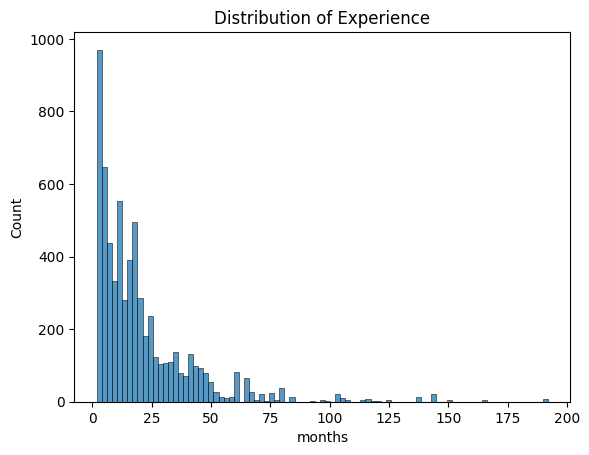

In [49]:
sns.histplot(x="months", data=df[df.months<200])
plt.title("Distribution of Experience")
plt.show()


### From this data we can make out that the students who are applying for Masters's degree have around 1-2 of professional work experience on an average.